In [124]:
import pandas as pd
import numpy as np
import random
import math
from tqdm import tqdm

In [125]:
data = pd.read_csv('../data/German2.csv')
feature_columns = [ col for col in data.columns if col not in ['id','target']]
# for col in feature_columns:
#     data[col] = pd.qcut(data[col], q=5, labels=False, duplicates='drop')
print(data[feature_columns].nunique())
# encode labels column to numbers
# y = data['outcome']

status_account      4
duration            5
credit_history      5
purpose            10
amount              5
svaing_account      5
present_emp         5
income_rate         4
personal_status     4
other_debtors       3
residence_info      4
property            4
age                 5
inst_plans          3
housing             3
num_credits         4
job                 4
dependents          2
telephone           2
foreign_worker      2
dtype: int64


In [126]:
len(data)

999

In [127]:
def calculate_equivalence_classes(data, condition_attrs):
    # 取出条件属性的列索引
    # 设置条件属性为索引
    # print(condition_attrs)
    data_indexed = data.set_index(condition_attrs)
    # 按照索引分组并将分组内结果合并为列表
    equivalence_classes = data_indexed.groupby(level=condition_attrs)[data.columns[0]].apply(list).to_dict()
    return equivalence_classes

In [128]:
def fitness_function(feature_columns,data,decision_attr):
    # 计算D的信息熵
    total_records = len(data)
    decision_counts = data[decision_attr].value_counts()
    decision_prob = decision_counts / total_records
    entropy_D = -(decision_prob * np.log2(decision_prob)).sum()

    equivalence_classes = calculate_equivalence_classes(data,feature_columns)
    equivalence_classes_dec = calculate_equivalence_classes(data, decision_attr)

    rule_confidences =0
    entropy_DB = 0
    count=0

    for equivalence_class in equivalence_classes.values():
        if len(equivalence_class)>2:
           print(equivalence_class)
           class_size = len(equivalence_class)
           max=0
           for key_decision in equivalence_classes_dec.keys():
               x=set(equivalence_class).intersection(equivalence_classes_dec.get(key_decision))
               if len(x) / class_size >max:
                   max=len(x)/class_size
           y=1-max
           rule_confidences=rule_confidences+y
           count=count+1

    for equivalence_class in equivalence_classes.values():
        class_size = len(equivalence_class)
        class_prob = class_size / total_records
        for key_decision in equivalence_classes_dec.keys():
            x=set(equivalence_class).intersection(equivalence_classes_dec.get(key_decision))
            if (len(x)>0):
                decision_prob = len(x) / class_size
                entropy_DB -= class_prob * decision_prob * math.log(decision_prob, 2)
    print(entropy_D-entropy_DB)
    avg_confidence = rule_confidences / count+0*(entropy_D-entropy_DB)
    return avg_confidence

In [129]:
feature_columns1=['status_account', 'duration', 'credit_history', 'purpose', 'amount', 'svaing_account', 'present_emp', 'income_rate', 'personal_status', 'other_debtors', 'residence_info', 'property', 'age', 'inst_plans', 'housing', 'num_credits', 'job', 'dependents', 'telephone', 'foreign_worker']
feature_columns2=['status_account', 'duration', 'credit_history', 'purpose', 'amount', 'svaing_account', 'present_emp', 'income_rate', 'personal_status', 'other_debtors', 'residence_info', 'property', 'age', 'inst_plans', 'housing', 'num_credits', 'job', 'dependents']
feature_columns3=['status_account', 'duration', 'credit_history', 'purpose', 'amount', 'svaing_account', 'present_emp', 'income_rate', 'personal_status', 'other_debtors', 'residence_info', 'property', 'age', 'inst_plans', 'housing', 'num_credits']
feature_columns4=['status_account', 'duration', 'credit_history', 'purpose', 'amount', 'svaing_account', 'present_emp', 'income_rate', 'personal_status', 'other_debtors', 'residence_info', 'property', 'age', 'inst_plans']
feature_columns5=['status_account', 'duration', 'credit_history', 'purpose', 'amount', 'svaing_account', 'present_emp', 'income_rate', 'personal_status', 'other_debtors', 'residence_info', 'property']
feature_columns6=['status_account', 'duration', 'credit_history', 'purpose', 'amount', 'svaing_account', 'present_emp', 'income_rate', 'personal_status', 'other_debtors']
feature_columns7=['status_account', 'duration', 'credit_history', 'purpose', 'amount', 'svaing_account', 'present_emp', 'income_rate']
feature_columns8=['status_account', 'duration', 'credit_history', 'purpose', 'amount', 'svaing_account']
feature_columns9=['status_account', 'duration', 'credit_history', 'purpose']
feature_columns10=['status_account', 'duration']
print(fitness_function(feature_columns6,data,'target'))

[862, 866, 896]
[71, 519, 803, 807]
0.8628840131694376
0.16666666666666669


In [130]:
a=[0. , 0.1 ,0.2, 0.3, 0.4, 0.5 ,0.6 ,0.7 ,0.8, 0.9 ,1. ]
b=[]
x=0.27580505206148975
y=0.13106513817672005
for i in a:
    b.append(x + i * y)
print(b)

[0.27580505206148975, 0.2889115658791618, 0.30201807969683375, 0.3151245935145058, 0.32823110733217775, 0.3413376211498498, 0.3544441349675218, 0.3675506487851938, 0.3806571626028658, 0.3937636764205378, 0.4068701902382098]


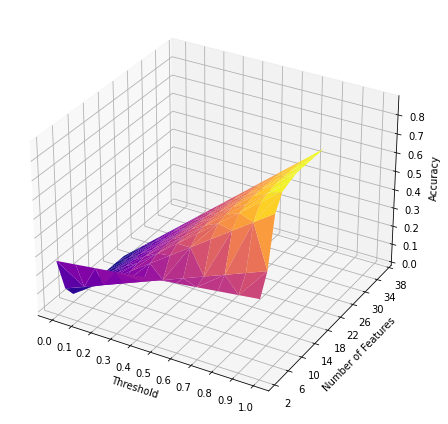

In [131]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
x = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
X, Y = np.meshgrid(x, y)
data=np.array([
    [0.27580505206148975, 0.2889115658791618, 0.30201807969683375, 0.3151245935145058, 0.32823110733217775, 0.3413376211498498, 0.3544441349675218, 0.3675506487851938, 0.3806571626028658, 0.3937636764205378, 0.4068701902382098],
    [0.09183509979528323, 0.1342487962952603, 0.17666249279523732, 0.21907618929521439, 0.26148988579519145, 0.30390358229516845, 0.3463172787951455, 0.38873097529512257, 0.43114467179509963, 0.4735583682950767, 0.5159720647950538],
    [0.026493330755847675, 0.10116718944022403, 0.17584104812460039, 0.2505149068089767, 0.3251887654933531, 0.39986262417772944, 0.47453648286210576, 0.5492103415464821, 0.6238842002308586, 0.6985580589152348, 0.7732319175996112],
    [0.007640369580668088, 0.09198583701030284, 0.17633130443993758, 0.26067677186957233, 0.3450222392992071, 0.42936770672884184, 0.5137131741584765, 0.5980586415881113, 0.6824041090177461, 0.7667495764473807, 0.8510950438770155],
    [0.004467353951890035, 0.0907557552688338, 0.17704415658577757, 0.2633325579027213, 0.3496209592196651, 0.43590936053660884, 0.5221977618535526, 0.6084861631704963, 0.6947745644874401, 0.781062965804384, 0.8673513671213277],
    [0.0, 0.08816576743327645, 0.1763315348665529, 0.2644973022998293, 0.3526630697331058, 0.4408288371663822, 0.5289946045996586, 0.6171603720329351, 0.7053261394662116, 0.793491906899488, 0.8816576743327644],
    [0.0, 0.08816576743327645, 0.1763315348665529, 0.2644973022998293, 0.3526630697331058, 0.4408288371663822, 0.5289946045996586, 0.6171603720329351, 0.7053261394662116, 0.793491906899488, 0.8816576743327644],
    [0.0, 0.08816576743327645, 0.1763315348665529, 0.2644973022998293, 0.3526630697331058, 0.4408288371663822, 0.5289946045996586, 0.6171603720329351, 0.7053261394662116, 0.793491906899488, 0.8816576743327644],
    [0.0, 0.08816576743327645, 0.1763315348665529, 0.2644973022998293, 0.3526630697331058, 0.4408288371663822, 0.5289946045996586, 0.6171603720329351, 0.7053261394662116, 0.793491906899488, 0.8816576743327644],
    [0.0, 0.08816576743327645, 0.1763315348665529, 0.2644973022998293, 0.3526630697331058, 0.4408288371663822, 0.5289946045996586, 0.6171603720329351, 0.7053261394662116, 0.793491906899488, 0.8816576743327644]
])

fig = plt.figure(figsize=(6,6))  # Set the size of the figure in inches
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(X.flatten(), Y.flatten(), data.flatten(), cmap='plasma')

# Set the axis labels
ax.set_xlabel('Threshold')
ax.set_ylabel('Number of Features')
ax.set_zlabel('Accuracy')

# Customize the tick labels
x_ticks = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y_ticks = [2, 6, 10, 14, 18, 22, 26, 30, 34, 38]
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)


# Save the plot in IEEE format
plt.tight_layout()
plt.savefig('test2.png', bbox_inches='tight',dpi=300)

# Show the plot in the console
plt.show()